<a href="https://colab.research.google.com/github/sambit985/Data-Science-and-Bussiness-Analytics/blob/main/Handwritten_digits.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Internship :- Suven Consultant & Pvt.Ltd

Name:- Sambit Kumar Nayak

Task:- Handwritten digit Recognition

#Import Liabraries

In [ ]:
 %matplotlib inline
 
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.datasets import fetch_openml
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn import metrics

Dataset from openml

https://www.openml.org/d/554 - Dataset

In [ ]:
mnist = fetch_openml('mnist_784')

In [ ]:
mnist.data[:5]

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

In [ ]:
mnist.target[:5]

array(['5', '0', '4', '1', '9'], dtype=object)

Plotting Actual label using matplotlib

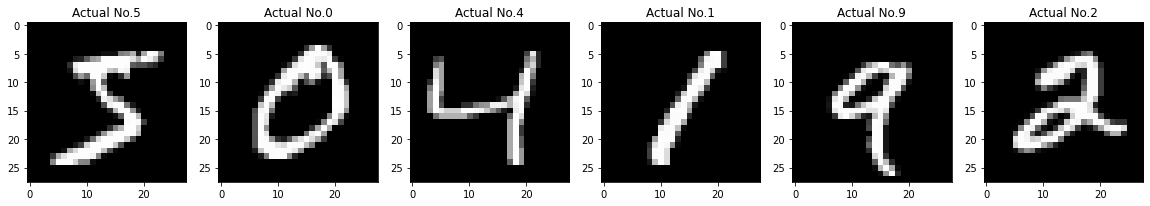

In [ ]:
plt.figure(figsize=(20,5))
for index, (image,label) in enumerate(zip(mnist.data[:6], mnist.target[:6])):
    plt.subplot(1, 6, index+1)
    plt.imshow(np.reshape(image, (28,28)), cmap="gray")
    plt.title("Actual No.%s" % label)

Splitting data into train and test measuring prediction score

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(mnist.data, mnist.target, test_size=0.2)

In [ ]:
mdl = LogisticRegression(solver="lbfgs",max_iter=126)
mdl.fit(X_train,y_train)
prediction = mdl.predict(X_test)
score = mdl.score(X_test, y_test) 
print(score)

0.9185
0.9185


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression


In [ ]:
print("Accurcay is :",round(score,2)*100,"%")

Accurcay is : 92.0 %


prediction: 7


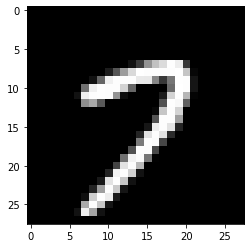

In [ ]:
index = 3
plt.imshow(np.reshape(X_test[index],(28,28)), cmap = "gray")
print("prediction: " + mdl.predict([X_test[index]])[0])

Confusion matrix value and visualization

In [ ]:
cm = metrics.confusion_matrix(y_test,prediction)
cm

array([[1315,    0,    5,    6,    3,   10,   10,    0,   13,    2],
       [   0, 1539,   14,    6,    1,    4,    0,    3,   15,    1],
       [   5,   17, 1260,   28,   13,    6,   12,   13,   40,    4],
       [   6,    3,   30, 1263,    5,   47,    2,   18,   23,   12],
       [   4,    6,    7,    3, 1259,    1,   13,    4,   15,   51],
       [  18,    8,   10,   45,   21, 1123,   21,    6,   44,    9],
       [   5,    3,    9,    0,   10,   24, 1316,    2,    5,    0],
       [   4,    3,   19,    5,   16,    1,    1, 1364,    5,   53],
       [   2,   26,   19,   35,    5,   41,   11,    9, 1172,   16],
       [   5,    9,    5,   29,   37,    6,    3,   44,   11, 1248]])

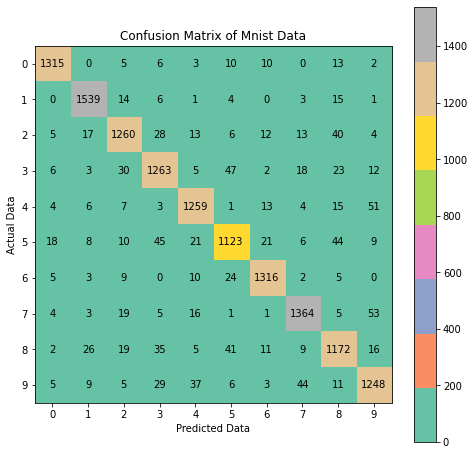

In [ ]:
plt.figure(figsize=(8,8))
plt.imshow(cm, cmap="Set2")
 
plt.xticks(np.arange(10))
plt.yticks(np.arange(10))
 
plt.xlabel("Predicted Data")
plt.ylabel("Actual Data")
plt.colorbar()
 
plt.title("Confusion Matrix of Mnist Data")
 
width, height = cm.shape
for x in range(width):
    for y in range(height):
        plt.annotate(str(cm[x][y]), xy=(y,x), horizontalalignment='center',verticalalignment='center')